In [4]:
import os
import numpy as np                  
import pandas as pd                
import matplotlib.pyplot as plt    
import seaborn as sns

print(os.getcwd())

c:\Users\marin\Desktop\Data Bootcamp\ProjecteData\Equip_11\Scripts


In [ ]:
BASE_DIR = os.getcwd()

csv_path = os.path.join(BASE_DIR, '..', 'Data', 'RRHH - 16062025.csv') # -- cambiar solo la fecha del fichero 

df_RRHH = pd.read_csv(csv_path)

df_RRHH

,ID,Reason_absence,Month_absence,Day_week,Seasons,Transportation_expense,Distance_Residence_Work,Service_time,Age,Work_load_Average_day,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_hours
0,1,0,3,5,4,235,11,14,37,244.387,...,1,3,1,0,0,1,88,172,29,0
1,1,1,5,2,4,235,11,14,37,246.074,...,0,3,1,0,0,1,88,172,29,8
2,1,7,4,6,4,235,11,14,37,326.452,...,0,3,1,0,0,1,88,172,29,3
3,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
4,1,13,1,3,3,235,11,14,37,330.061,...,0,3,1,0,0,1,88,172,29,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,132,13,6,6,1,235,11,14,37,377.550,...,0,3,1,0,0,1,88,172,29,16
836,133,18,1,3,3,155,12,14,34,313.532,...,0,1,2,1,0,0,95,196,25,8
837,134,0,10,6,2,118,13,18,50,265.017,...,1,1,1,1,0,0,98,178,31,0
838,135,23,2,3,3,225,26,9,28,264.249,...,0,1,1,0,0,2,69,169,24,3


In [6]:
# Promedio de absentismo según consumo social de alcohol
df_RRHH.groupby('Social_drinker')['Absenteeism_hours'].mean()


Social_drinker
0    5.740223
1    8.165975
Name: Absenteeism_hours, dtype: float64

In [7]:
# Promedio de absentismo según consumo social de tabaco
df_RRHH.groupby('Social_smoker')['Absenteeism_hours'].mean()

Social_smoker
0    7.163265
1    6.696429
Name: Absenteeism_hours, dtype: float64

In [8]:
df_RRHH['Social_drinker'].value_counts()
df_RRHH['Social_smoker'].value_counts()

Social_smoker
0    784
1     56
Name: count, dtype: int64

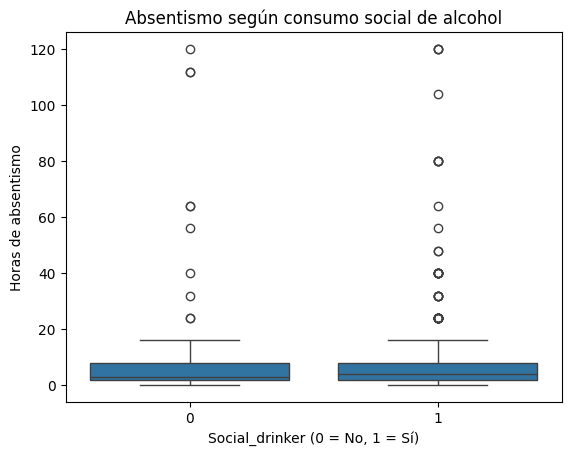

In [9]:
# Boxplot para consumo de alcohol
sns.boxplot(x='Social_drinker', y='Absenteeism_hours', data=df_RRHH)
plt.title("Absentismo según consumo social de alcohol")
plt.xlabel("Social_drinker (0 = No, 1 = Sí)")
plt.ylabel("Horas de absentismo")
plt.show()

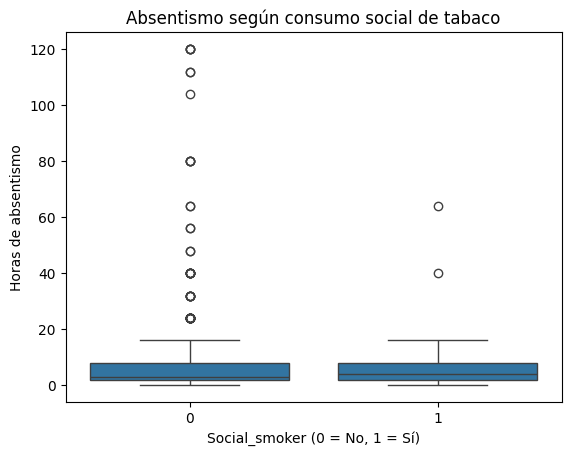

In [10]:
# Boxplot para consumo de tabaco
sns.boxplot(x='Social_smoker', y='Absenteeism_hours', data=df_RRHH)
plt.title("Absentismo según consumo social de tabaco")
plt.xlabel("Social_smoker (0 = No, 1 = Sí)")
plt.ylabel("Horas de absentismo")
plt.show()

In [14]:
import statsmodels.api as sm

# Variable dependiente
y = df_RRHH['Absenteeism_hours']

# Variables independientes
X = df_RRHH[['Social_drinker', 'Social_smoker']]

In [17]:
X = sm.add_constant(X)

modelo = sm.OLS(y, X).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:      Absenteeism_hours   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     3.258
Date:                Thu, 26 Jun 2025   Prob (F-statistic):             0.0389
Time:                        12:41:28   Log-Likelihood:                -3384.1
No. Observations:                 840   AIC:                             6774.
Df Residuals:                     837   BIC:                             6788.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.7353      0.743      7.